# 12 Jan - Word2Vec

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

### 1. Loading Data

In [2]:
#define the training corpus
#I use the Inaugural Address Corpus from NLTK
import nltk
from nltk.corpus import inaugural
corpus = nltk.corpus.inaugural.sents()

In [3]:
corpus

[['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':'], ['Among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ...]

In [4]:
len(corpus)

5220

In [5]:
#the corpus is already tokenized
#convert the words in the corpus into lower case
corpus_tokenized = [[]] * len(corpus)
for i in range(len(corpus)):
    corpus_tokenized[i] = [word.lower() for word in corpus[i]]

print(corpus_tokenized[:5])

[['fellow', '-', 'citizens', 'of', 'the', 'senate', 'and', 'of', 'the', 'house', 'of', 'representatives', ':'], ['among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ['on', 'the', 'one', 'hand', ',', 'i', 'was', 'summoned', 'by', 'my', 'country', ',', 'whose', 'voice', 'i', 'can', 'never', 'hear', 'but', 'with', 'veneration', 'and', 'love', ',', 'from', 'a', 'retreat', 'which', 'i', 'had', 'chosen', 'with', 'the', 'fondest', 'predilection', ',', 'and', ',', 'in', 'my', 'flattering', 'hopes', ',', 'with', 'an', 'immutable', 'decision', ',', 'as', 'the', 'asylum', 'of', 'my', 'declining', 'years', '--', 'a', 'retreat', 'which', 'was', 'rendered', 'every', 'day', 'more', 'necessary', 'as', 'well', 'as', 'more', 'dear',

In [6]:
#remove stop words with SpaCy
import spacy
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in stopwords:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', '-', 'citizens', 'senate', 'house', 'representatives', ':'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', ',', 'received', '14th', 'day', 'present', 'month', '.'], ['hand', ',', 'summoned', 'country', ',', 'voice', 'hear', 'veneration', 'love', ',', 'retreat', 'chosen', 'fondest', 'predilection', ',', ',', 'flattering', 'hopes', ',', 'immutable', 'decision', ',', 'asylum', 'declining', 'years', '--', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', ',', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time', '.'], ['hand', ',', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', ',', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', ',', 'overwhelm', 'despondence', '(', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 

In [7]:
#remove punctutations with String
import string
punctutations = string.punctuation

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in punctutations:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', 'citizens', 'senate', 'house', 'representatives'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month'], ['hand', 'summoned', 'country', 'voice', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', '--', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time'], ['hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', 'overwhelm', 'despondence', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 'ought', 'peculiarly', 'conscious', 'deficiencies'], ['conflict', 'emotions', 'dare',

In [8]:
#remove '--'
for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word == '--':
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', 'citizens', 'senate', 'house', 'representatives'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month'], ['hand', 'summoned', 'country', 'voice', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time'], ['hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', 'overwhelm', 'despondence', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 'ought', 'peculiarly', 'conscious', 'deficiencies'], ['conflict', 'emotions', 'dare', 'aver

In [9]:
window_size = 2

skip_grams = []
for sentence in corpus_tokenized[:2]:
    for i in range(window_size, len(sentence) - window_size):
            center = sentence[i]
            context = []
            for j in range(window_size):
                context.append(sentence[i + j - window_size])
            for k in range(window_size):
                context.append(sentence[i + k + 1])
            for w in context:
                skip_grams.append([center, w])

print(skip_grams)

[['senate', 'fellow'], ['senate', 'citizens'], ['senate', 'house'], ['senate', 'representatives'], ['life', 'vicissitudes'], ['life', 'incident'], ['life', 'event'], ['life', 'filled'], ['event', 'incident'], ['event', 'life'], ['event', 'filled'], ['event', 'greater'], ['filled', 'life'], ['filled', 'event'], ['filled', 'greater'], ['filled', 'anxieties'], ['greater', 'event'], ['greater', 'filled'], ['greater', 'anxieties'], ['greater', 'notification'], ['anxieties', 'filled'], ['anxieties', 'greater'], ['anxieties', 'notification'], ['anxieties', 'transmitted'], ['notification', 'greater'], ['notification', 'anxieties'], ['notification', 'transmitted'], ['notification', 'order'], ['transmitted', 'anxieties'], ['transmitted', 'notification'], ['transmitted', 'order'], ['transmitted', 'received'], ['order', 'notification'], ['order', 'transmitted'], ['order', 'received'], ['order', '14th'], ['received', 'transmitted'], ['received', 'order'], ['received', '14th'], ['received', 'day'], 

In [10]:
#get unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs = list(set(flatten(corpus_tokenized)))

print(len(vocabs))

9019


In [11]:
#numericalize the words
word2index = {w: i for i, w in enumerate(vocabs)}

In [12]:
#append <UNK>
vocabs.append('<UNK>')
word2index['<UNK>'] = 9019

print(word2index)

{'energetic': 0, 'distinction': 1, 'chief': 2, 'turns': 3, 'sentiments': 4, 'obnoxious': 5, 'knows': 6, 'arises': 7, 'league': 8, 'discriminations': 9, 'math': 10, 'futile': 11, 'measure': 12, 'attitudes': 13, 'xwe': 14, 'inborn': 15, 'emotion': 16, 'unsurpassed': 17, 'construed': 18, 'hospitable': 19, 'dramatically': 20, 'heavy': 21, 'universities': 22, 'decayed': 23, 'violative': 24, 'amendatory': 25, 'mouth': 26, 'brown': 27, 'britain': 28, 'confined': 29, 'idealism': 30, 'evince': 31, 'hiding': 32, 'absorbed': 33, 'pleasant': 34, 'appalled': 35, 'proclaiming': 36, 'struggled': 37, 'denies': 38, 'share': 39, 'participants': 40, 'auspiciously': 41, 'worthily': 42, 'vain': 43, 'ascertain': 44, 'play': 45, 'philosophy': 46, 'persevering': 47, 'empower': 48, 'abolishing': 49, 'g': 50, 'ill': 51, 'facilities': 52, 'views': 53, 'teachings': 54, 'toilers': 55, 'enforcement': 56, 'executed': 57, 'ambitions': 58, 'attained': 59, 'interdependent': 60, 'vietnam': 61, 'undertakings': 62, 'beati

In [13]:
#create index2wrod in case that we need to use
index2word = {v:k for k, v in word2index.items()}

### 2. Preparing Traning Data

In [14]:
#random batch for Skip-gram model with generic window size and batch size
def random_batch_skip_gram(window_size=1, batch_size=1): 
    skip_grams = []
    for sentence in corpus_tokenized[:2]:
        for i in range(window_size, len(sentence) - window_size):
            center = word2index[sentence[i]]
            context = []
            for j in range(window_size):
                context.append(word2index[sentence[i + j - window_size]])
            for k in range(1, window_size + 1):
                context.append(word2index[sentence[i + k]])
            for w in context:
                skip_grams.append([center, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])
        random_labels.append([skip_grams[i][1]])
            
    return np.array(random_inputs), np.array(random_labels)

In [15]:
#test the Skip-gram method with window size = 2 and batch size = 2
input_batch, target_batch = random_batch_skip_gram(2, 2)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [[5136]
 [7436]]
Target:  [[2133]
 [4749]]


In [16]:
#random batch for CBOW model with generic window size and batch size
def random_batch_cbow(window_size=1, batch_size=1): 
    cbow = []
    for sentence in corpus_tokenized[:2]:
        for i in range(window_size, len(sentence) - window_size):
            center = word2index[sentence[i]]
            context = []
            for j in range(window_size):
                context.append(word2index[sentence[i + j - window_size]])
            for k in range(1, window_size + 1):
                context.append(word2index[sentence[i + k]])
            cbow.append([context, center])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(cbow)), batch_size, replace=False)
    for i in random_index:
        random_inputs.append([cbow[i][0]])
        random_labels.append([cbow[i][1]])
            
    return np.array(random_inputs), np.array(random_labels)

In [17]:
#test the CBOW method with window size = 2 and batch size = 2
input_batch, target_batch = random_batch_cbow(2, 2)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [[[5136  578 7436 3260]]

 [[ 578 6985 3260 4749]]]
Target:  [[6985]
 [7436]]


### 3. Skip-gram

#### 3.1. Model

In [18]:
#Skip-gram model
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_center_word = nn.Embedding(vocab_size, emb_size)
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_center_word(center_words)  #[batch_size, 1, emb_size]
        target_embeds = self.embedding_outside_word(target_words)  #[batch_size, 1, emb_size]
        all_embeds    = self.embedding_outside_word(all_vocabs)    #[batch_size, vocab_size, emb_size]
        
        scores      = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, vocab_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, vocab_size, 1] = [batch_size, vocab_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)    
            
        return nll # negative log likelihood

#### 3.2. Training

In [19]:
#set training parameters
vocab_size = len(vocabs)
window_size = 2
batch_size = 2
emb_size = 2
model = Skipgram(vocab_size, emb_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)

#prepare all_vocabs tensor
def prepare_sequence(vocabs, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], vocabs))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, vocab_size)

#calculate epoch time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time // 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

#train the model
import time

num_epochs = 5000
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch_skip_gram(window_size, batch_size)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)

        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1000 | cost: 7.864150 | time: 0m 2s
Epoch: 2000 | cost: 8.728324 | time: 0m 4s
Epoch: 3000 | cost: 9.559920 | time: 0m 6s
Epoch: 4000 | cost: 6.372364 | time: 0m 8s
Epoch: 5000 | cost: 5.501029 | time: 0m 11s


#### 3.3. Plotting the Embeddings

In [20]:
#get embedding
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

['energetic', 'distinction', 'chief', 'turns', 'sentiments', 'obnoxious', 'knows', 'arises', 'league', 'discriminations', 'math', 'futile', 'measure', 'attitudes', 'xwe', 'inborn', 'emotion', 'unsurpassed', 'construed', 'hospitable']


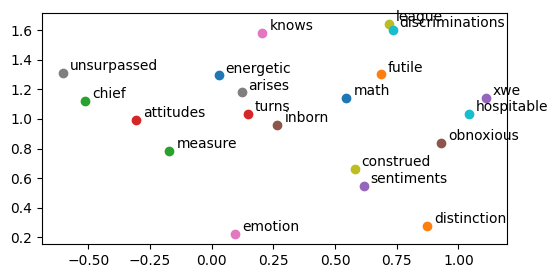

In [21]:
#plot the embeddings of the first 20 vocabs
print(vocabs[:20])

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 3.4. Cosine Similarity

In [22]:
#select a few vocabs and get their embeddings
liberty = get_embed('liberty')
freedom = get_embed('freedom')
democracy = get_embed('democracy')
law = get_embed('law')


#define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

#print cosine similarities between the selected vocabs
print(f"liberty vs. freedom: ", cos_sim(liberty, freedom))
print(f"liberty vs. democracy: ", cos_sim(liberty, democracy))
print(f"liberty vs. law: ", cos_sim(liberty, law))

liberty vs. freedom:  0.723701722015291
liberty vs. democracy:  0.6669633148427668
liberty vs. law:  0.5625914579395215


### 4. Skip-gram with Negative Sampling

#### 4.1. Unigram Distribution

In [23]:
#count all the occurrences of vocabs
from collections import Counter
word_count = Counter(flatten(corpus_tokenized))

word_count

Counter({'fellow': 158,
         'citizens': 248,
         'senate': 16,
         'house': 12,
         'representatives': 19,
         'vicissitudes': 5,
         'incident': 8,
         'life': 140,
         'event': 16,
         'filled': 6,
         'greater': 54,
         'anxieties': 3,
         'notification': 1,
         'transmitted': 3,
         'order': 66,
         'received': 12,
         '14th': 1,
         'day': 98,
         'present': 86,
         'month': 2,
         'hand': 51,
         'summoned': 6,
         'country': 322,
         'voice': 24,
         'hear': 12,
         'veneration': 5,
         'love': 56,
         'retreat': 9,
         'chosen': 23,
         'fondest': 1,
         'predilection': 1,
         'flattering': 1,
         'hopes': 38,
         'immutable': 3,
         'decision': 14,
         'asylum': 1,
         'declining': 3,
         'years': 143,
         'rendered': 7,
         'necessary': 82,
         'dear': 8,
         'addition': 6,


In [24]:
#count the number of total words
num_total_words = sum([c for w, c in word_count.items()])

num_total_words

58916

In [25]:
#create the unigram table
z = 0.001
unigram_table = []

for v in vocabs:
    unigram_table.extend([v] * int(((word_count[v]/num_total_words)**0.75)/z))

Counter(unigram_table)

Counter({'distinction': 1,
         'chief': 3,
         'sentiments': 2,
         'measure': 3,
         'heavy': 1,
         'idealism': 1,
         'share': 4,
         'play': 1,
         'ill': 1,
         'facilities': 1,
         'views': 3,
         'enforcement': 2,
         'executed': 1,
         'attained': 1,
         'revolutionary': 1,
         'promises': 1,
         'today': 9,
         'intercourse': 2,
         'watching': 1,
         'gather': 1,
         'enabled': 1,
         'consequences': 2,
         'lead': 3,
         'build': 2,
         'spain': 1,
         'achieved': 1,
         'relief': 2,
         'concern': 2,
         'acquired': 1,
         'aggression': 1,
         'deserve': 1,
         'shall': 19,
         'taxation': 2,
         'reserved': 2,
         'speak': 3,
         'election': 3,
         'injustice': 1,
         'vigorous': 1,
         'court': 1,
         'conditions': 3,
         'penalties': 1,
         'fervently': 1,
         'cha

#### 4.2. Negative Sampling

In [26]:
import random

def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

#test the negative sampling method
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

num_neg = 3
negative_sampling(target_batch, unigram_table, num_neg)

tensor([[8774, 1515, 1891],
        [6942, 7071, 2331]])

#### 4.3. Model

In [27]:
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_center_word = nn.Embedding(vocab_size, emb_size) # center embedding
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size) # out embedding
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, center_words, target_words, negative_words):
        center_embeds = self.embedding_center_word(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_outside_word(target_words) # [batch_size, 1, emb_size]
        neg_embeds    = -self.embedding_outside_word(negative_words) # [batch_size, num_neg, emb_size]
        
        positive_score = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        negative_score = neg_embeds.bmm(center_embeds.transpose(1, 2))
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1]
        
        loss = self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1)
                
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embeds = self.embedding_center_word(inputs)
        
        return embeds

#### 4.4. Training

In [28]:
window_size = 2
batch_size  = 2
emb_size    = 2
model       = SkipgramNegSampling(vocab_size, emb_size)
num_neg     = 10
optimizer   = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5000
start = time.time()
for epoch in range(num_epochs):    
    input_batch, target_batch = random_batch_skip_gram(window_size, batch_size)
    input_batch = torch.LongTensor(input_batch)
    target_batch = torch.LongTensor(target_batch)
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()   
    loss = model(input_batch, target_batch, negs_batch)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1000 | cost: 7.669856 | time: 0m 1s
Epoch: 2000 | cost: 7.513507 | time: 0m 2s
Epoch: 3000 | cost: 8.907591 | time: 0m 4s
Epoch: 4000 | cost: 8.124203 | time: 0m 6s
Epoch: 5000 | cost: 7.287500 | time: 0m 8s


#### 4.5. Plotting the Embeddings

['energetic', 'distinction', 'chief', 'turns', 'sentiments', 'obnoxious', 'knows', 'arises', 'league', 'discriminations', 'math', 'futile', 'measure', 'attitudes', 'xwe', 'inborn', 'emotion', 'unsurpassed', 'construed', 'hospitable']


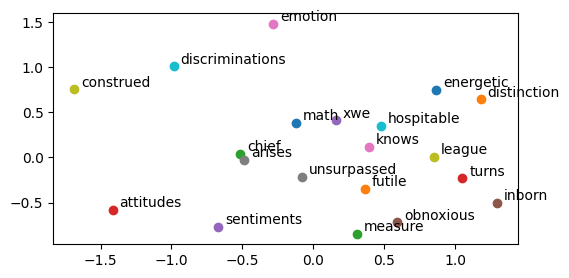

In [29]:
#plot the embeddings of the first 20 vocabs
print(vocabs[:20])

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 4.6. Cosine Similarity

In [30]:
#select a few vocabs and get their embeddings
liberty = get_embed('liberty')
freedom = get_embed('freedom')
democracy = get_embed('democracy')
law = get_embed('law')


#define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

#print cosine similarities between the selected vocabs
print(f"liberty vs. freedom: ", cos_sim(liberty, freedom))
print(f"liberty vs. democracy: ", cos_sim(liberty, democracy))
print(f"liberty vs. law: ", cos_sim(liberty, law))

liberty vs. freedom:  -0.9584203419743637
liberty vs. democracy:  -0.8381107346192991
liberty vs. law:  -0.8763017931537199


### 5. CBOW

#### 5.1. Model

#### 5.2. Training

#### 5.3. Plotting the Embeddings

#### 5.4. Cosine Similarity